# ~~~~~ Day 9 ~~~~~ 
## Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

with open('d09.txt', 'r') as f:
    content = f.readlines()

data = [[int(c) for c in list(d.strip('\n'))] for d in content]
heightmap = np.asarray(data)
print(heightmap.shape)
heightmap

(100, 100)


array([[5, 4, 5, ..., 8, 9, 9],
       [4, 3, 4, ..., 6, 6, 8],
       [1, 2, 9, ..., 4, 5, 7],
       ...,
       [1, 0, 1, ..., 9, 6, 7],
       [2, 1, 2, ..., 4, 5, 6],
       [3, 6, 5, ..., 2, 3, 7]])

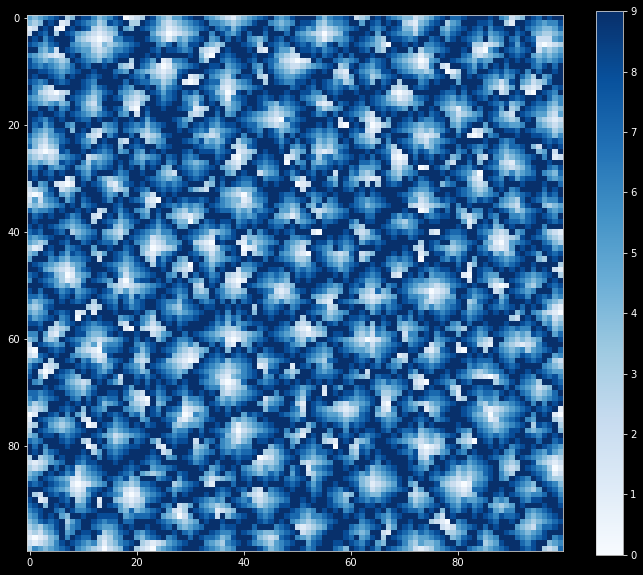

In [2]:
fig = plt.figure(figsize=(12,10))
plt.imshow(heightmap, cmap='Blues')
plt.colorbar()

In [3]:
padded_heightmap = np.full((heightmap.shape[0]+2, heightmap.shape[1]+2), 99, dtype=int)
padded_heightmap[1:heightmap.shape[0]+1, 1:heightmap.shape[1]+1] = heightmap
print(padded_heightmap.shape)
padded_heightmap

(102, 102)


array([[99, 99, 99, ..., 99, 99, 99],
       [99,  5,  4, ...,  9,  9, 99],
       [99,  4,  3, ...,  6,  8, 99],
       ...,
       [99,  2,  1, ...,  5,  6, 99],
       [99,  3,  6, ...,  3,  7, 99],
       [99, 99, 99, ..., 99, 99, 99]])

In [4]:
shifted_heightmaps = []
for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
    shifted_heightmaps.append(np.roll(padded_heightmap, d, axis=(0, 1)))
heightmap_diffs = padded_heightmap[:, :, np.newaxis] < np.dstack(shifted_heightmaps)
heightmap_diffs = heightmap_diffs[1:heightmap_diffs.shape[0]-1, 1:heightmap_diffs.shape[1]-1, :] # cut the edges

In [5]:
print(heightmap_diffs.shape)
risk_levels = heightmap[np.where(np.all(heightmap_diffs, axis=2))] + 1
print(f'Sum of risk levels: {np.sum(risk_levels)}')

(100, 100, 4)
Sum of risk levels: 506


## Part 2

In [6]:
basins = np.zeros(heightmap.shape, dtype=int)
basins[np.where(heightmap==9)] = -1
low_points = np.where(np.all(heightmap_diffs, axis=2))

i = 0
for r, c in zip(*np.where(np.all(heightmap_diffs, axis=2))):
    i += 1
    basins[r, c] = i
N = i

i = 0
while np.sum(basins == 0):
    i += 1
    if i > 1000: raise Exception('max iterations')
    for r, c in zip(*np.where(basins==0)):
        if r>0 and basins[r-1, c]>0:
            basins[r, c] = basins[r-1, c]
        elif r<basins.shape[0]-1 and basins[r+1, c]>0:
            basins[r, c] = basins[r+1, c]
        elif c>0 and basins[r, c-1]>0:
            basins[r, c] = basins[r, c-1]
        elif c<basins.shape[1]-1 and basins[r, c+1]>0:
            basins[r, c] = basins[r, c+1]                

sizes = []
for i in range(0, N+1):
    sizes.append(np.sum(basins==i))
    
print(np.prod(sorted(sizes, reverse=True)[:3]))

931200
